In [2]:
#By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to 
#plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, 
#rather than the absolute count.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# plots to be rendered inside the notebook
%matplotlib inline

In [4]:
pokemon = pd.read_csv('./pokemon.csv')
print(pokemon.shape)
pokemon.head(10)
pokemon[802:812]

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79
806,807,zeraora,7,1.5,44.5,270,electric,NaN,88,112,75,143,102,80


In [5]:
# https://www.journaldev.com/33398/pandas-melt-unmelt-pivot-function
# id_vars = ['id', 'species'] choses the columns
# We can pass the ‘var_name’ and ‘value_name’ parameters to change the column names of ‘variable’ and ‘value’.
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [6]:
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [7]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

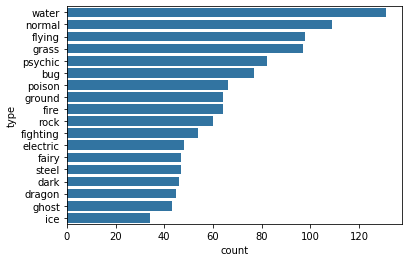

In [8]:
base_color = sb.color_palette()[0]
sb.countplot(data= pkmn_types, y= 'type', color = base_color, order = type_order );

In [9]:
pokemon.shape

(807, 14)

In [10]:
n_pokemon = pokemon.shape[0]
type_counts[0]

131

In [11]:
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1623296158612144

In [12]:
np.arange(0, max_prop, 0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [13]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

In [15]:
print(tick_props)
print(n_pokemon)
tick_props * n_pokemon

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16]
807


array([  0.  ,  16.14,  32.28,  48.42,  64.56,  80.7 ,  96.84, 112.98,
       129.12])

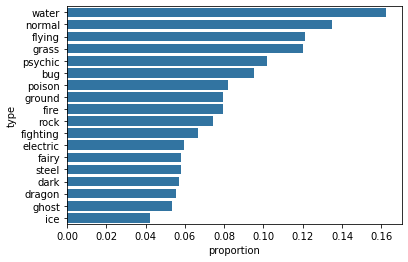

In [17]:
base_color = sb.color_palette()[0]
sb.countplot(data= pkmn_types, y= 'type', color = base_color, order = type_order );
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

In [33]:
type_counts.shape[0]

18

In [34]:
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

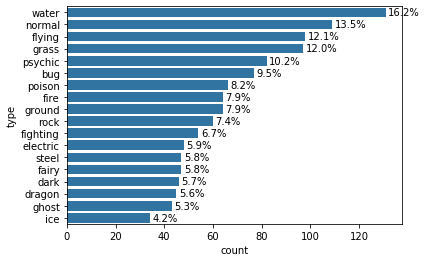

In [35]:
base_color = sb.color_palette()[0]
sb.countplot(data= pkmn_types, y= 'type', color = base_color, order = type_order );

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i , pct_string, va='center');

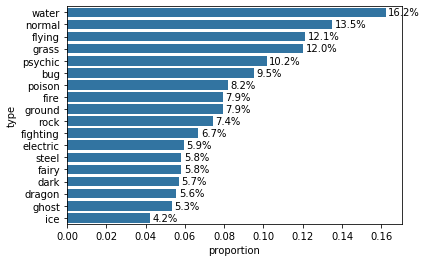

In [36]:
base_color = sb.color_palette()[0]
sb.countplot(data= pkmn_types, y= 'type', color = base_color, order = type_order );
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i , pct_string, va='center');